***
# Stats and Public Health I Deliverable


## By: Tolulope Acquah
***

For this deliverable, basic EDA and Data Wrangling was performed to understand and get familiar with the provided West Nile Virus (WNV) dataset from the City of Illinois.

**The details for the data provided is as follows:**

**Year:** Year that the WNV test is performed. *[int64]*

**Month:** 	Week that the WNV test is performed. *[int64]*

**Address Block:** Address of the location of trap. *[string]*

**Block:** Block number of address. *[int64]*

**Trap:** Id of the trap. *[string]*

*Some traps are "satellite traps". These are traps that are set up near (usually within 6 blocks) an established trap to enhance surveillance efforts. Satellite traps are post fixed with letters. For example, T220A is a satellite trap to T220.*

**Trap Type:** Type of trap. *[string]*

**Date:** Date and time that the WNV test is performed. *[string]*

*Please note that not all the locations are tested at all times. Also, records exist only when a particular species of mosquitoes is found at a certain trap at a certain time.*

**Mosquito number:** Number of mosquitoes caught in this trap. *[int64]*

*These test results are organized in such a way that when the number of mosquitoes exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitoes are capped at 50.*

**Mosquito ID:** Id for Mosquito species. *[string]*

**WNV Present:** Whether West Nile Virus was present in these mosquitos. *[string]*

**Species:** Mosquito species. *[string]*

**Lat:** Latitude of trap. *[float64]*

**Lon:** Longitude of trap. *[float64]*

Before performing the Basic EDA and Data Wrangling, Numpy, Pandas, Matplotlib, Scipy, and Seaborn were imported:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

Next, the data from the provided CSV file was loaded:

In [2]:
# load from csv
mosquito_df = pd.read_csv('mosquito_data.csv')

To make sure the right data was loaded with the corresponding values, I displayed it by showing the first 5 rows:

In [3]:
mosquito_df.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


Now that I know the data loaded correctly, I wanted to understand what was in the data:

In [4]:
# To see the list of columns:

print(mosquito_df.columns)

Index(['Year', 'Week', 'Address Block', 'Block', 'Trap', 'Trap type', 'Date',
       'Mosquito number', 'Mosquito ID', 'WNV Present', 'Species', 'Lat',
       'Lon'],
      dtype='object')


In [5]:
# See the last 5 rows

mosquito_df.tail()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
18490,2016,36,3XX W 18TH ST,3,T043,GRAVID,2016-09-09 00:09:00,4,Pip,positive,CULEX PIPIENS,41.857843,-87.635858
18491,2007,34,46XX N MILWAUKEE AVE,46,T003,GRAVID,2007-08-24 00:08:00,19,Pip,positive,CULEX PIPIENS,41.965376,-87.758403
18492,2016,30,127XX S DOTY AVE,127,T115,GRAVID,2016-07-27 00:07:00,34,Res,positive,CULEX RESTUANS,41.662395,-87.590176
18493,2017,33,20XX N DOMINICK ST,20,T240B,SENTINEL,2017-08-17 00:08:00,50,Res,positive,CULEX RESTUANS,41.919197,-87.664758
18494,2015,33,100XX W OHARE AIRPORT,100,T902,GRAVID,2015-08-20 00:08:00,6,Res,positive,CULEX RESTUANS,NaN,NaN


In [6]:
# See the summary stats for numeric columns

mosquito_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,18495.0,2012.905812,3.725857,2007.000000,2010.000000,2013.000000,2016.000000,2019.000000
Week,18495.0,31.004001,4.332020,20.000000,28.000000,31.000000,34.000000,40.000000
Block,18495.0,54.314788,36.712796,1.000000,22.000000,51.000000,89.000000,132.000000
Mosquito number,18495.0,10.879913,13.475066,1.000000,2.000000,5.000000,14.000000,50.000000
Lat,15571.0,41.839963,0.111374,41.644720,41.742670,41.845715,41.945961,42.017801
Lon,15571.0,-87.691642,0.076545,-87.854473,-87.747459,-87.691698,-87.637873,-87.531051


In [7]:
mosquito_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


The `mosquito_df.info()` shows that **Lat** and **Lon** have some null values.

***
## PART 1 - BASIC DATA WRANGLING


***
### **Question 1:**

What is the shape of the dataframe?
***

In [8]:
#Shape of the DataFrame:

mosquito_df.shape

(18495, 13)

The shape of the dataframe is `(18495,13)`, which is 18,495 rows and 13 columns

***
### Question 2:

Convert the 'Date' column to have a datetime format.
***

In [9]:
# first checking what the current data type is
mosquito_df.dtypes

Year                 int64
Week                 int64
Address Block       object
Block                int64
Trap                object
Trap type           object
Date                object
Mosquito number      int64
Mosquito ID         object
WNV Present         object
Species             object
Lat                float64
Lon                float64
dtype: object

In [10]:
# Convert with astypes

mosquito_df.Date = mosquito_df.Date.astype('datetime64')

In [11]:
# check if it worked

mosquito_df.dtypes

Year                        int64
Week                        int64
Address Block              object
Block                       int64
Trap                       object
Trap type                  object
Date               datetime64[ns]
Mosquito number             int64
Mosquito ID                object
WNV Present                object
Species                    object
Lat                       float64
Lon                       float64
dtype: object

According to the results of using `.dtypes` to see the data type of each column, the date column is now `datetime64` which means that the data type has been changed to have a datetime format.

***
### Question 3:

Pick two numeric and two categorical columns: What data are they storing? How are they distributed?
***

Using the same code from Question 2: `mosquito_df.dtypes`, I chose categorical columns based on the data types not having "`int64`", "`float64`", or  "`datetime`".

**Chosen categorical columns:** 
- Mosquito ID
- WNV Present

Similar to the approach for choosing categorical columns, for numeric columns, I chose columns with data types of "`int64`".

**Chosen numeric columns:**
- Mosquito Number
- Year

#### For Categorical Columns: 

To determine how the chosen categorical columns are distributed, the `plt.bar()` was used to see the counts of observation in each categorical bin.

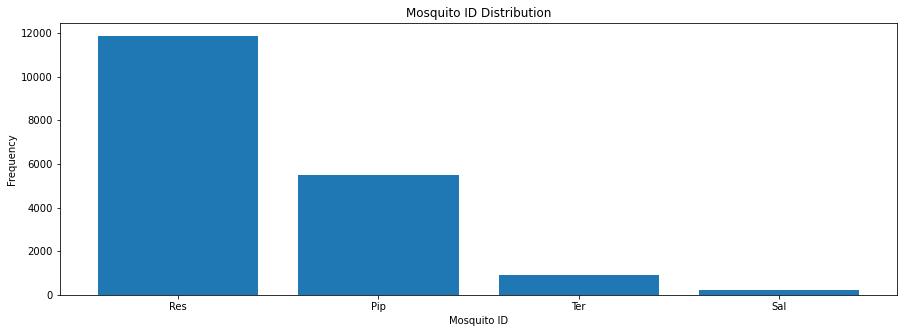

Res    11866
Pip     5486
Ter      917
Sal      226
Name: Mosquito ID, dtype: int64


In [12]:
# Create a bar chart showing the count of the individual Mosquito ID:

MI_value_counts = mosquito_df['Mosquito ID'].value_counts()
plt.figure(figsize=(15,5))

plt.bar(MI_value_counts.index, 
        MI_value_counts.values)
        
plt.title("Mosquito ID Distribution")
plt.xlabel("Mosquito ID")
plt.ylabel("Frequency")

plt.show()

print(MI_value_counts)

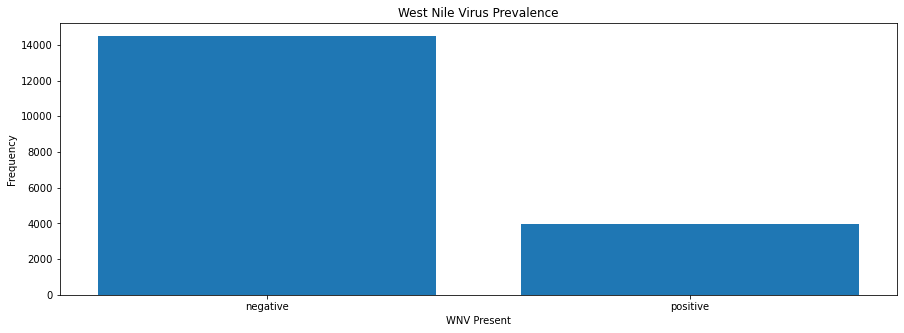

negative    14501
positive     3994
Name: WNV Present, dtype: int64


In [13]:
# Create a bar chart showing the count of positive and negative WNV tests:

WNV_value_counts = mosquito_df['WNV Present'].value_counts()
plt.figure(figsize=(15,5))

plt.bar(WNV_value_counts.index, 
        WNV_value_counts.values)
        
plt.title("West Nile Virus Prevalence")
plt.xlabel("WNV Present")
plt.ylabel("Frequency")

plt.show()
print(WNV_value_counts)

#### Findings from the Distribution of the Categorical Columns:

**Mosquito ID:**
* The Mosquito ID column stores the type of mosquito species found in the mosquitoes trapped. In this case, there are a total of four (4) mosquito species found: **Res, Pip, Ter, and Sal.**

* Based on the distribution, the most common species found in the trap was Res, with a total count of 11,866. The second most common species found in the trap was Pip, with a total count of 5,486 almost 50% lower than the count for Res.

* The least common species found in the trap was Ter with a total count of 917, and Sal with a total count of 226.

**WNV Present:**
* The WNV Present column stores the result of the tests on if the WNV was present in the mosquitoes or not. The column has strings of "negative" or "positive" to identify the presence of WNV in the trapped mosquitoes.

* Based on the distribution, a little over 70% of trapped mosquitoes tested negative for the West Nile Virus with a count of 14,501. While almost 30% of trapped mosquitoes tested positive for the WNV with a count of 3,994. This tells me that a majority of the mosquitoes trapped do not carry the WNV.

#### For Numeric Columns:

To determine how the chosen numeric columns are distributed, histograms were created below:

Before making the histograms, to understand the distribution of the data, the mean, mode, median, and standard deviation for both the mosquito number and Year was determined first, and then showed in the histogram.

In [14]:
# found the mean, mode, median and standard deviation for the mosquito number to understand how it is distributed.

MN_mean = mosquito_df["Mosquito number"].mean()
MN_mode = mosquito_df["Mosquito number"].mode()
MN_median = mosquito_df["Mosquito number"].median()
MN_sdev = mosquito_df["Mosquito number"].std()

print(MN_mean)
print(MN_mode)
print(MN_median)
print(MN_sdev)

10.879913490132468
0    1
dtype: int64
5.0
13.475065566131548


In [15]:
# found the mean, mode, median and standard deviation for the year to understand how it is distributed.

YR_mean = mosquito_df["Year"].mean()
YR_mode = mosquito_df["Year"].mode()
YR_median = mosquito_df["Year"].median()
YR_sdev = mosquito_df["Year"].std()

print(YR_mean)
print(YR_mode)
print(YR_median)
print(YR_sdev)

2012.905812381725
0    2007
dtype: int64
2013.0
3.7258571822695075


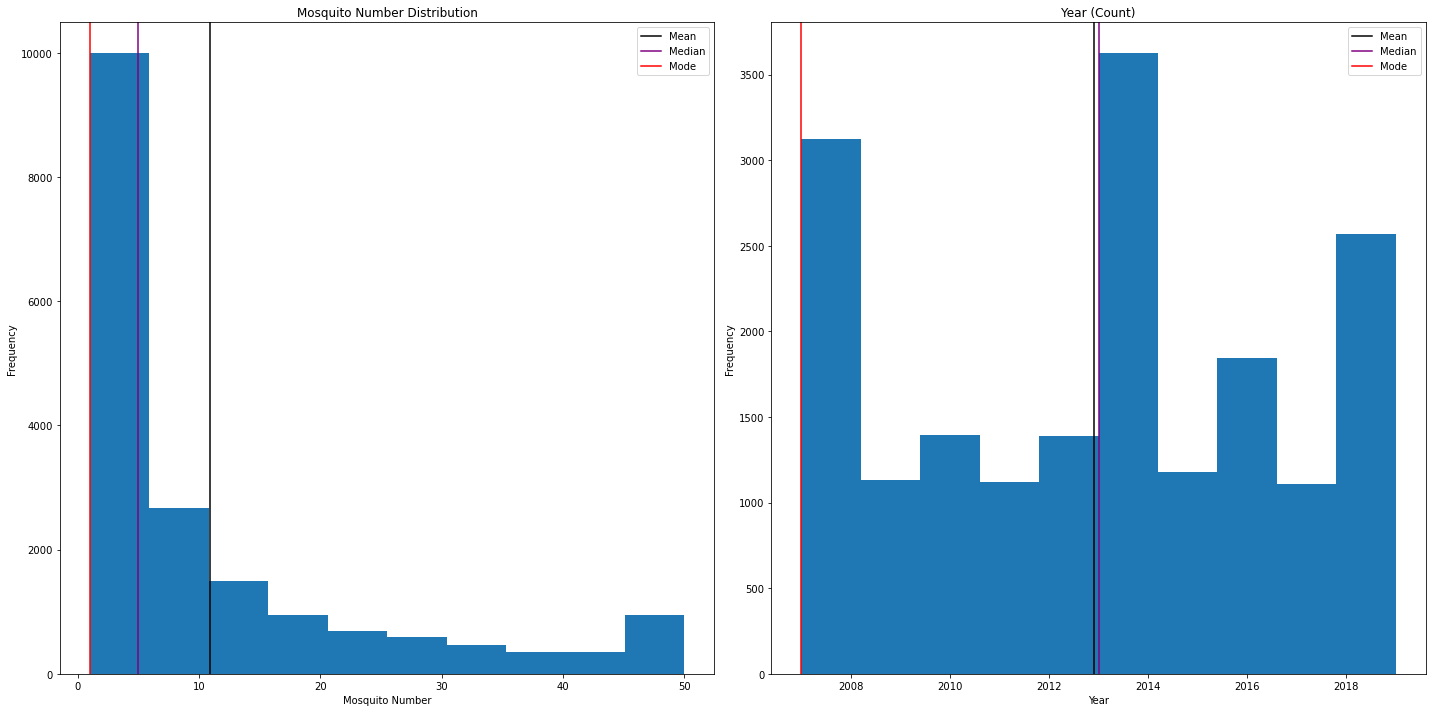

In [16]:
# Histograms for the numeric columns: Mosquito numbers and Year

plt.subplots(1, 2, figsize = (20, 10))

plt.subplot(1, 2, 1)
plt.hist(mosquito_df['Mosquito number'])

plt.xlabel("Mosquito Number")
plt.ylabel("Frequency")
plt.title("Mosquito Number Distribution")

plt.axvline(MN_mean, c="black", label="Mean")
plt.axvline(MN_median, c="purple", label="Median")
plt.axvline(MN_mode[0], c="red", label="Mode")
# plt.axvline(MN_sdev, c="lightblue", label="Standard Deviation")

plt.legend()

#-----------------------------------------

plt.subplot(1, 2, 2)
plt.hist(mosquito_df['Year'])

plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Year (Count)")

plt.axvline(YR_mean, c="black", label="Mean")
plt.axvline(YR_median, c="purple", label="Median")
plt.axvline(YR_mode[0], c="red", label="Mode")
#plt.axvline(YR_sdev, c="lightblue", label="Standard Deviation")

plt.tight_layout()
plt.legend()
plt.show()

#### Findings from the Distribution of the Numeric Columns:

**Mosquito Number:**
* The Mosquito Number column stores the number of mosquitoes caught in the trap.


* Based on the distribution, the center mass is close to the median, which is 5. This tells me that majority of set traps collected 5 mosquitoes in the traps. Most records of tested mosquitoes are between 1 and 6 mosquitoes.


* It is also understood that the test results of the number of mosquitoes caught are organized in a way that when the number of mosquitoes exceed 50, the remainder of the number of mosquitoes are split into another row in the dataset so that the number of mosquitoes don't exceed 50.


* Seeing as there is a suprising frequency of 50 mosquitoes caught in the trap, it could also mean that the traps had more than 50 mosquitoes, and the remainder was split on another row of the dataset where the median is located - 5 mosquitoes. Simply put, the majority of traps having 5 mosquitoes could also be a remnant of the capped 50 mosquitoes.

**Year:**
* The "Year" column stores the year that the WNV tests were performed. Based on the histogram prepared for the Year column, tests were done the most between 2013-2014, followed by 2007-2008, and 2018-2019.

***
### Question 4:

Are there any columns that contain duplicate information? If so, remove the redundant columns.
***

In [17]:
# code to find duplicated columns. First transposed the rows to columns, since the .duplicated() only works for rows.

mosquito_df.T.duplicated()

Year               False
Week               False
Address Block      False
Block              False
Trap               False
Trap type          False
Date               False
Mosquito number    False
Mosquito ID        False
WNV Present        False
Species            False
Lat                False
Lon                False
dtype: bool

In [18]:
# taken 10 random rows to visually inspect any redundant information/columns:

mosquito_df.sample(10)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
17194,2013,28,70XX N MOSELLE AVE,70,T008,GRAVID,2013-07-12 00:07:00,45,Res,positive,CULEX RESTUANS,42.008002,-87.778229
15498,2014,37,39XX S ASHLAND AVE,39,T074,GRAVID,2014-09-11 00:09:00,20,Pip,positive,CULEX PIPIENS,41.820862,-87.665103
652,2019,28,58XX N PULASKI RD,58,T027,GRAVID,2019-07-11 00:07:00,1,Res,negative,CULEX RESTUANS,41.986320,-87.728378
5345,2014,38,58XX N PULASKI RD,58,T027,GRAVID,2014-09-18 00:09:00,8,Res,negative,CULEX RESTUANS,41.986320,-87.728378
9965,2011,28,25XX S MILLARD AVE,25,T152,GRAVID,2011-07-15 00:07:00,5,Res,negative,CULEX RESTUANS,41.845715,-87.715899
4954,2015,26,37XX E 118TH ST,37,T212,GRAVID,2015-07-02 00:07:00,10,Res,negative,CULEX RESTUANS,41.681035,-87.533436
13317,2008,30,70XX N MOSELLE AVE,70,T008,GRAVID,2008-07-28 00:07:00,1,Pip,negative,CULEX PIPIENS,42.007998,-87.778235
12627,2009,22,4XX W 127TH,4,T135,GRAVID,2009-06-05 00:06:00,3,Pip,negative,CULEX PIPIENS,NaN,NaN
2044,2018,24,77XX S EBERHART AVE,77,T080,GRAVID,2018-06-14 00:06:00,23,Res,negative,CULEX RESTUANS,41.754148,-87.612721
16040,2012,27,52XX S KOLMAR AVE,52,T114,GRAVID,2012-07-09 00:07:00,50,Res,positive,CULEX RESTUANS,41.798217,-87.736918


To check for duplicates in the columns, I applied the `.duplicated()` to the transpose. Based on the results from the code, and visual inspection of the columns, there seem to be no redundant columns.

***
### Question 5:

Are there any null values in the dataframe? If so, deal with them appropriately.
***

In [19]:
# To check how many missing values there are in each column:

mosquito_df.isna().sum()

Year                  0
Week                  0
Address Block         0
Block                 0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
Mosquito ID           0
WNV Present           0
Species               0
Lat                2924
Lon                2924
dtype: int64

Based on the results above, there are a total of 2,924 null values in the Lat and Lon columns.

In [20]:
# To get the proportion of nulls missing:

mosquito_df.isna().mean()*100

Year                0.000000
Week                0.000000
Address Block       0.000000
Block               0.000000
Trap                0.000000
Trap type           0.000000
Date                0.000000
Mosquito number     0.000000
Mosquito ID         0.000000
WNV Present         0.000000
Species             0.000000
Lat                15.809678
Lon                15.809678
dtype: float64

Seeing as the Latitude and Longitude have a little over 15% of the data filled with NaNs, I thought it would be best not to remove those rows as they may contain valuable information for other columns. I determined the mean, mode, and median for the Latitude and Longitude columns to determine which values are closest to the most popular distribution. I filled the NaNs with the value that is closest to the densest distribution.

In [21]:
mosquito_df[["Lat", "Lon"]]

,Lat,Lon
0,NaN,NaN
1,41.798211,-87.736925
2,41.987245,-87.689417
3,41.953664,-87.724987
4,41.657069,-87.546049
...,...,...
18490,41.857843,-87.635858
18491,41.965376,-87.758403
18492,41.662395,-87.590176
18493,41.919197,-87.664758


In [22]:
# found the mean, median, and mode to see which one is closest to the densest region of the distribution

print(mosquito_df.Lat.mean())
print(mosquito_df.Lat.median())
print(mosquito_df.Lat.mode())

41.83996347772076
41.845715402
0    41.956299
dtype: float64


In [23]:
print(mosquito_df.Lon.mean())
print(mosquito_df.Lon.median())
print(mosquito_df.Lon.mode())

-87.69164248395428
-87.691697729
0   -87.797517
dtype: float64


Now that I have the mean, median and mode for the Lat and Lon, I plotted both columns to visually inspect whether the mean, median, or mode is close to the densest region of the distribution.

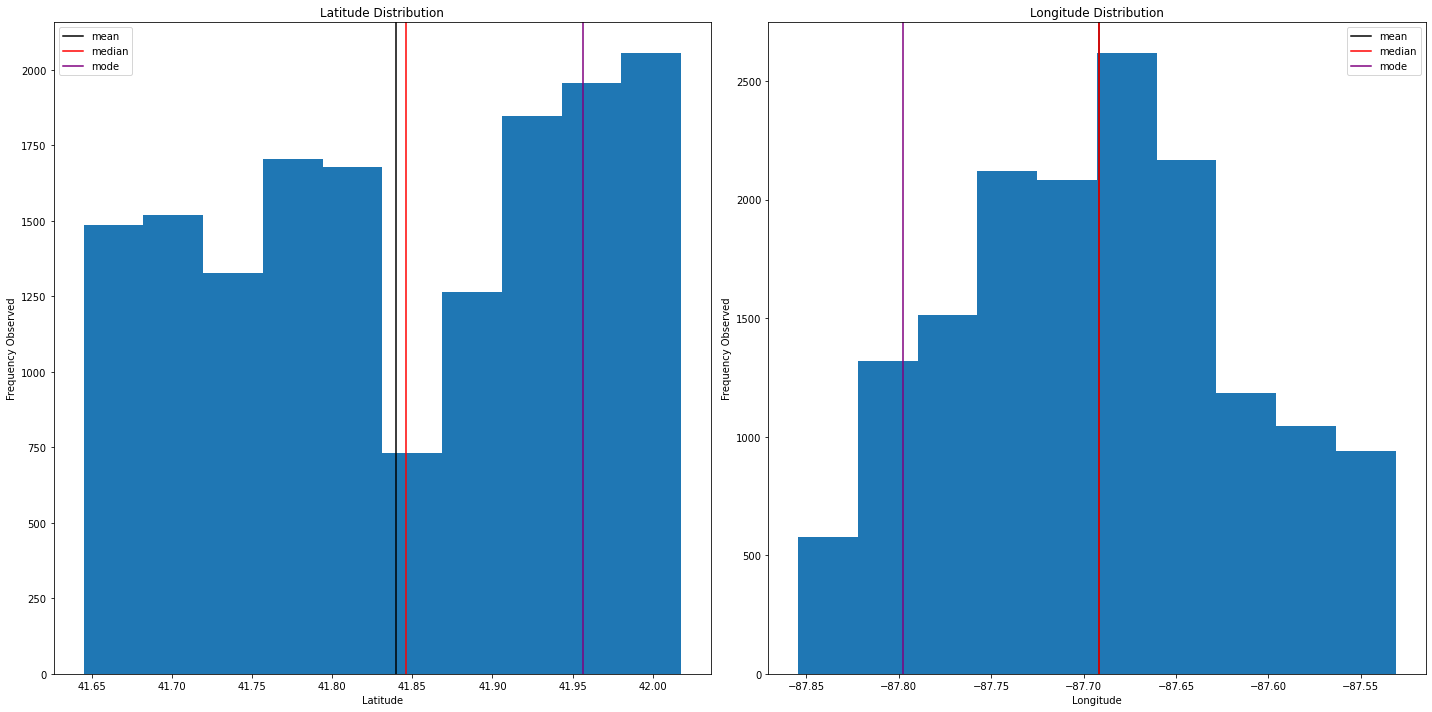

In [24]:
plt.subplots(1, 2, figsize = (20, 10))

plt.subplot(1, 2, 1)
plt.hist(mosquito_df.Lat)

plt.axvline(mosquito_df.Lat.mean(), c="black", label='mean')
plt.axvline(mosquito_df.Lat.median(), c="red", label='median')
plt.axvline(mosquito_df.Lat.mode()[0], c="purple", label='mode')

plt.xlabel("Latitude")
plt.ylabel("Frequency Observed")
plt.title("Latitude Distribution")

plt.legend()

#-----------------------------------------

plt.subplot(1, 2, 2)
plt.hist(mosquito_df.Lon)

plt.axvline(mosquito_df.Lon.mean(), c="black", label='mean')
plt.axvline(mosquito_df.Lon.median(), c="red", label='median')
plt.axvline(mosquito_df.Lon.mode()[0], c="purple", label='mode')

plt.xlabel("Longitude")
plt.ylabel("Frequency Observed")
plt.title("Longitude Distribution")

plt.legend()

plt.tight_layout()
plt.show()

Based on the visuals above, for Latitude, the ***mode*** is the closest to the densest part of the distribution. Therefore, the NaNs will be filled by the mode.

For Longitude, the ***median*** is the closest to the most dense part of the distribution. Therefore, the NaNs for the Longitude will be filled by the median.

In [25]:
# Filling the NaNs:

mosquito_df.Lat = mosquito_df.Lat.fillna(mosquito_df.Lat.mode()[0])

mosquito_df.Lon = mosquito_df.Lon.fillna(mosquito_df.Lon.median())

In [26]:
# To check that it worked:

mosquito_df.isna().mean() * 100

Year               0.0
Week               0.0
Address Block      0.0
Block              0.0
Trap               0.0
Trap type          0.0
Date               0.0
Mosquito number    0.0
Mosquito ID        0.0
WNV Present        0.0
Species            0.0
Lat                0.0
Lon                0.0
dtype: float64

There are no more NaN values in the Latitude and Longitude columns!

***
## PART 2 - BASIC EDA
***

***
### Question 1: 

Using an appropriate visual, or visuals, explore the relationship between mosquito number and date.
***

In [27]:
# First, let me see the data for the date and mosquito number columns:

mosquito_df[["Date", "Mosquito number"]].head()

,Date,Mosquito number
0,2019-09-26 00:09:00,2
1,2019-09-26 00:09:00,1
2,2019-09-26 00:09:00,2
3,2019-09-26 00:09:00,1
4,2019-09-26 00:09:00,9


To explore the relationship between the mosquito numbers and the date, I decided to group the data by the Year and find the total amount of mosquitoes for each year to see which years had the most number of mosquitoes and which year had the least number of mosquitoes.

I did this by grouping the `Date` column. I used `dt.year` to group the date by year, and `.rename` to change the index name from 'Date' to 'Year.'

I found the use of `.dt.year` and `.rename` from the following links:

https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html

https://pandas.pydata.org/docs/reference/api/pandas.Series.rename.html



In [28]:
# Started by grouping the data by the 'Date', specifically the 'Year':

mosquito_df.groupby(mosquito_df["Date"].dt.year).sum()

,Year,Week,Block,Mosquito number,Lat,Lon
Date,,,,,,
2007,4296987,67980,116864,25094,89565.053851,-187732.942888
2008,1975872,30206,55026,3882,41176.948627,-86284.681204
2009,2280215,33094,63685,5528,47500.850384,-99525.121711
2010,2807970,43316,79130,8115,58478.365138,-122498.797850
2011,2252320,34216,63680,7795,46880.601618,-98211.196862
2012,2800704,42827,73158,11342,58275.064031,-122072.519104
2013,3269112,51414,84175,24724,67982.278402,-142414.355067
2014,4028000,64906,103427,29888,83722.551183,-175392.183019
2015,2373670,35046,66973,11763,49322.416352,-103307.612811


In [29]:
# Renamed the 'Date' column to 'Year'

mosquito_df.groupby([mosquito_df['Date'].dt.year.rename('Year')]).sum()

,Year,Week,Block,Mosquito number,Lat,Lon
Year,,,,,,
2007,4296987,67980,116864,25094,89565.053851,-187732.942888
2008,1975872,30206,55026,3882,41176.948627,-86284.681204
2009,2280215,33094,63685,5528,47500.850384,-99525.121711
2010,2807970,43316,79130,8115,58478.365138,-122498.797850
2011,2252320,34216,63680,7795,46880.601618,-98211.196862
2012,2800704,42827,73158,11342,58275.064031,-122072.519104
2013,3269112,51414,84175,24724,67982.278402,-142414.355067
2014,4028000,64906,103427,29888,83722.551183,-175392.183019
2015,2373670,35046,66973,11763,49322.416352,-103307.612811


In [30]:
# Now found the sum of Mosquito numbers for each year

mosquito_df.groupby([mosquito_df['Date'].dt.year.rename('Year')]).sum()["Mosquito number"]

Year
2007    25094
2008     3882
2009     5528
2010     8115
2011     7795
2012    11342
2013    24724
2014    29888
2015    11763
2016    36893
2017    10632
2018    15538
2019    10030
Name: Mosquito number, dtype: int64

In [31]:
# assigned the sum of mosquitoes and year to a variable, for easy plotting

year_MN = mosquito_df.groupby([mosquito_df['Date'].dt.year.rename('Year')]).sum()["Mosquito number"]

year_MN

Year
2007    25094
2008     3882
2009     5528
2010     8115
2011     7795
2012    11342
2013    24724
2014    29888
2015    11763
2016    36893
2017    10632
2018    15538
2019    10030
Name: Mosquito number, dtype: int64

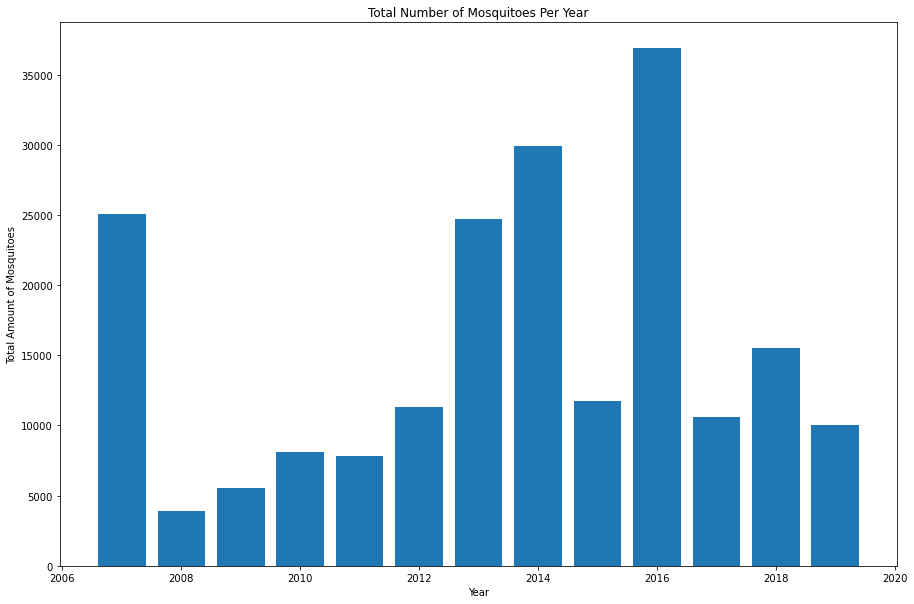

In [32]:
# Used a bar chart to visualize the total number of mosquitoes per year:

plt.figure(figsize=(15,10))

plt.bar(year_MN.index, year_MN.values)

plt.xlabel('Year')
plt.ylabel('Total Amount of Mosquitoes')
plt.title('Total Number of Mosquitoes Per Year')

plt.show()

**The relationship between the Mosquito Number and the Date:**
* Based on the data, the maximum total number of mosquitoes caught in the trap and tested was in the year of 2016. This tells me that WNV tests were conducted the most in 2016. After 2016, 2014 was the year with the next highest amount of mosquitoes caught.


* There was significant drop in WNV tests in 2008, with 2007 being the 3rd year with the most tests conducted and total amount of mosquitoes caught.

***
## PART 3 - ADVANCED EDA

***
### Question 1:

Using an appropriate visual, explore the relationship between mosquito species and WNV prevalence.
***

In [33]:
# to see the data with the mosquito species and WNV prevalence columns:

mosquito_df[["Species", "WNV Present"]].head()

,Species,WNV Present
0,CULEX RESTUANS,negative
1,CULEX RESTUANS,negative
2,CULEX RESTUANS,negative
3,CULEX RESTUANS,negative
4,CULEX RESTUANS,negative


In [34]:
# to differentiate the data based on the results of the WNV test:

species_WNV = mosquito_df.groupby(["Species", "WNV Present"]).count()["Mosquito number"]
species_WNV

Species           WNV Present
CULEX PIPIENS     negative       4074
                  positive       1412
CULEX RESTUANS    negative       9309
                  positive       2557
CULEX SALINARIUS  negative        215
                  positive         11
CULEX TERRITANS   negative        903
                  positive         14
Name: Mosquito number, dtype: int64

In [35]:
# to have a better view of the number of negative and positive tests for each species:

species_WNV_unstack = species_WNV.unstack().sort_values(by='negative', ascending=False)

species_WNV_unstack

WNV Present,negative,positive
Species,,
CULEX RESTUANS,9309,2557
CULEX PIPIENS,4074,1412
CULEX TERRITANS,903,14
CULEX SALINARIUS,215,11


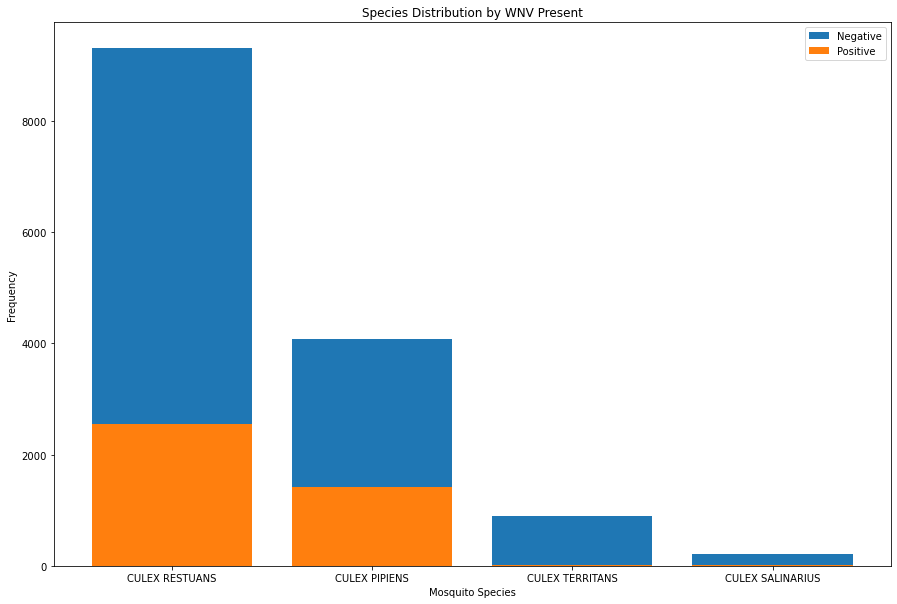

In [36]:
plt.figure(figsize=(15, 10))

plt.bar(species_WNV_unstack.index, species_WNV_unstack['negative'], label="Negative")
plt.bar(species_WNV_unstack.index, species_WNV_unstack['positive'], label="Positive")

plt.xlabel('Mosquito Species')
plt.ylabel('Frequency')
plt.title('Species Distribution by WNV Present')

plt.legend()

plt.show()

**The relationship between Mosquito Species and WNV Prevalence:**

* Based on the data, the species with the most number of tests conducted with a negative result is Culex Restuans.


* The species with the most number of tests conducted with a positive result is also Culex Restuans. This could mean that the most popular species of the mosquitoes tested is Culex Restauas, not necessarily that WNV is found more in Culex Restuans than the other species.


* After Culex Restuans, the species with the most number of tests conducted with a negative result is Culex Pipiens, and with a positive result (also after Culex Restuans), is still Culex Pipiens. This again could mean that the most common species found in the mosquitoes trapped is Culex Restuans and Culex Pipiens.


* For Culex Restuans and Culex Pipiens, a little over 70% of the WNV tests conducted resulted in a negative test.


* Regarding the other species, the data shows that it is more likely that the WNV tests are negative for the Culex Salinarius and Culex Territans species (with over 90% of the tests being negative for both species). This insight could change if more species of Culex Salinarius and Culex Territans are tested.


***
### Question 2:

Using an appropriate visual, explore the relationship between the number of mosquitos caught and trap type.
Note: This visual should be a different type of visualization than the previous one
***

In [37]:
# to see the data with the mosquito number and trap type columns:
mosquito_df[["Mosquito number", "Trap type"]]

,Mosquito number,Trap type
0,2,GRAVID
1,1,GRAVID
2,2,GRAVID
3,1,GRAVID
4,9,GRAVID
...,...,...
18490,4,GRAVID
18491,19,GRAVID
18492,34,GRAVID
18493,50,SENTINEL


In [38]:
# to understand the total amount of mosquitoes for each trap type
mosquito_df.groupby("Trap type").sum()["Mosquito number"].sort_values(ascending=False)

Trap type
GRAVID      186206
CDC           9883
SENTINEL      5134
OVI              1
Name: Mosquito number, dtype: int64

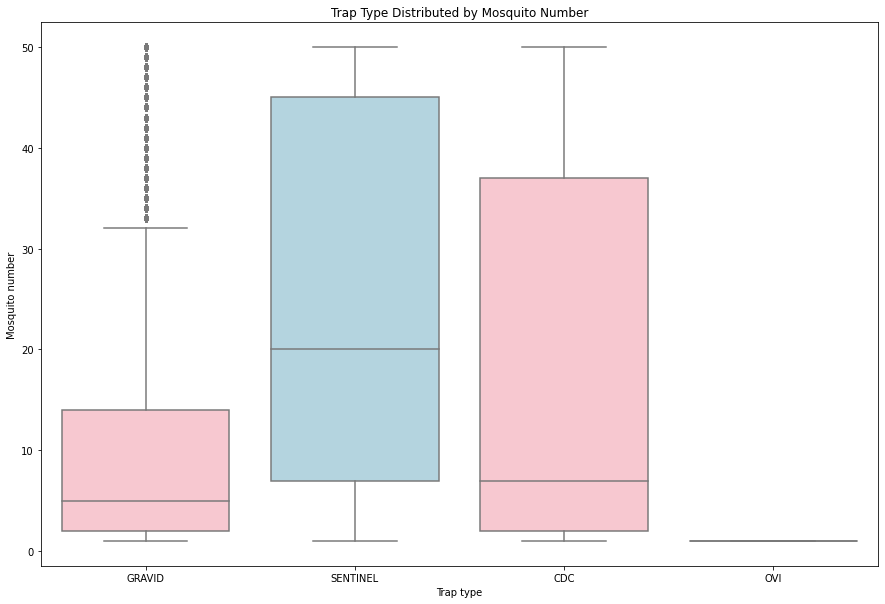

In [39]:
plt.figure(figsize=(15,10))

sns.boxplot(x=mosquito_df["Trap type"], y=mosquito_df['Mosquito number'], palette=["pink", "lightblue"])
plt.title('Trap Type Distributed by Mosquito Number')

plt.show()

**The relationship between the number of mosquitoes caught and the trap type:**
* Since there is only a total number of one (1) mosquito caught in the OVI trap type, the distribution information regarding this trap type is being excluded.
    - OVI's minimum and maximum number of mosquitoes caught is 1.


* For all other trap types: Gravid, Sentinel, and CDC, the distribution according to the boxplot is positively skewed,  seeing as the box plots show the median closer to the lower/bottom quartile.


* The boxplot shows that the Sentinel trap type has the most diverse number of mosquitoes in the data, followed by the CDC trap type. It is interesting that there are a lot of outliers for the Gravid trap type, seeing as Gravid is the trap that has the highest total amount of mosquitoes caught.


* Gravid 
    - 50% of the data is within 1 and a little below 15 mosquitoes caught.
    - The median is about 5 mosquitoes.
    
    
* Sentinel 
    - 50% of the data is within 8 and 45 mosquitoes caught.
    - The median is 20 mosquitoes.
    
    
* CDC 
    - 50% of the data is within 1 and a little below 40 mosquitoes caught.
    - The median is about 8 mosquitoes.


***
### Question 3:

Using an appropriate visual, come up with an additional insight of your choice.
Note: This visual should be a different type of visualization than the previous two
***

I thought it would be interesting to see the relationship between the mosquito number and the mosquito species. I wanted to see what species had the highest and lowest total amount of mosquitoes caught.

In [40]:
# To see what is in the data again:
mosquito_df.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.956299,-87.691698
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [41]:
# Grouped the data by species and the sum of all the mosquitoes caught:

species_sum = mosquito_df.groupby("Species").sum()["Mosquito number"]
species_sum.sort_values(ascending=False)

Species
CULEX RESTUANS      137586
CULEX PIPIENS        61364
CULEX TERRITANS       1810
CULEX SALINARIUS       464
Name: Mosquito number, dtype: int64

From the result above from the grouping and sum of mosquitoes, it is interesting to see that the Culex Restuans species is the most popular type of mosquitoes caught with a total number of 137,586 mosquitoes. This number is significantly higher than the second most popular mosquito species - Culex Pipiens, with a total number of 61,364 mosquitoes caught.

I decided to visualize this in a pie chart to show the significant difference in the species and total number of mosquitoes caught.

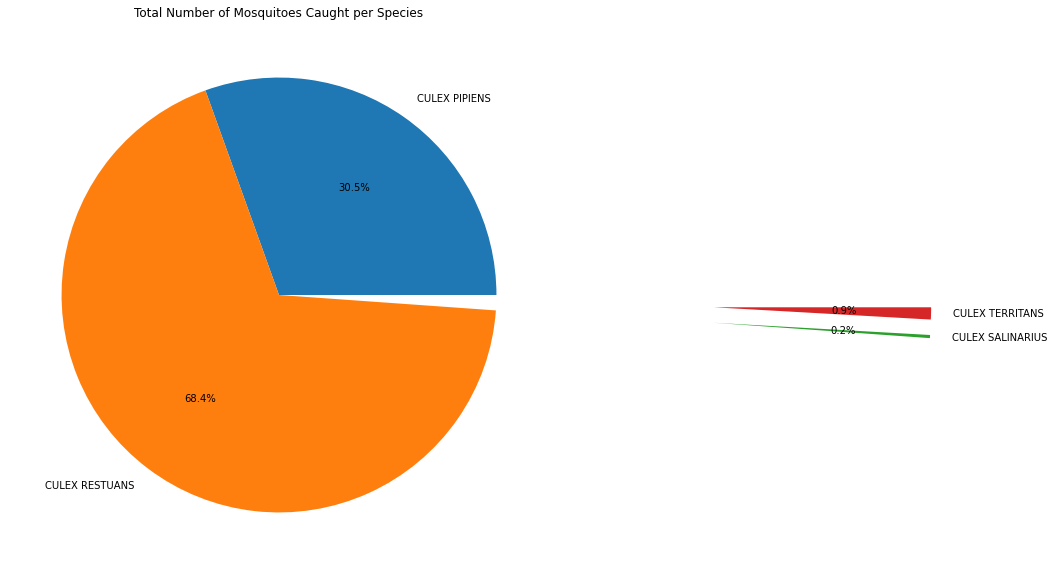

In [42]:
plt.figure(figsize=(15, 10))


plt.pie(species_sum, labels=species_sum.index, autopct='%1.1f%%', explode=(0,0,2,2))
plt.title("Total Number of Mosquitoes Caught per Species")
plt.show()

Because the Culex Territans and Culex Salinarius species are too small with regards to the total number of mosquitoes caught, I decided to explode it to avoid the overlapping of the texts. I also wanted to show the percentage of the total number of mosquitoes caught in the pie chart. 

To do this, I found the use of `autopct=%1.1f%%` to provide the percentage on the pie chart, and the use of `explode` to get the other species with low amounts of mosquitoes caught to a display where the texts don't overlap. The link below was used to understand `autopct` and `explode` :

https://datatofish.com/pie-chart-matplotlib/ 